# A simple example

VID: example_1
Motifs: ['ACGT']
Loaded 10 tandem repeat sequences
Decomposing TR sequences
 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% 
Encoding
Alignment
Visualization


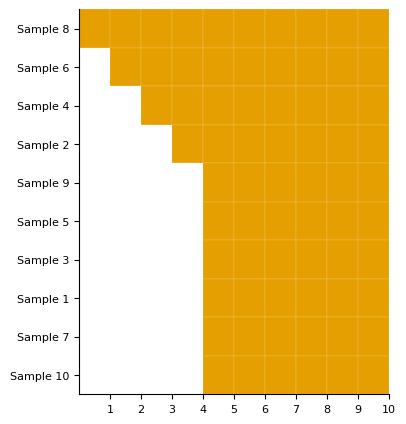

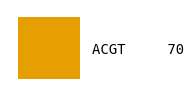

In [1]:
from trviz.main import TandemRepeatVizWorker
tr_visualizer = TandemRepeatVizWorker()
tr_id = "example_1"
tr_sequences = ['ACGTACGTACGTACGTACGTACGT',
           'ACGTACGTACGTACGTACGTACGTACGT',
           'ACGTACGTACGTACGTACGTACGT',
           'ACGTACGTACGTACGTACGTACGTACGTACGT',
           'ACGTACGTACGTACGTACGTACGT',
           'ACGTACGTACGTACGTACGTACGTACGTACGTACGT',
           'ACGTACGTACGTACGTACGTACGT',
           'ACGTACGTACGTACGTACGTACGTACGTACGTACGTACGT',
           'ACGTACGTACGTACGTACGTACGT',
           'ACGTACGTACGTACGTACGTACGT',
           ]
sample_ids = [f"Sample {x}" for x in range(1, len(tr_sequences) + 1)]
motifs = ['ACGT']

tr_visualizer.generate_trplot(tr_id, sample_ids, tr_sequences, motifs, show_figure=True)